In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to include the channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
'''
After reshaping:

x_train has the shape (60000, 28, 28, 1).
x_test has the shape (10000, 28, 28, 1).
'''

# Convert labels to categorical (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


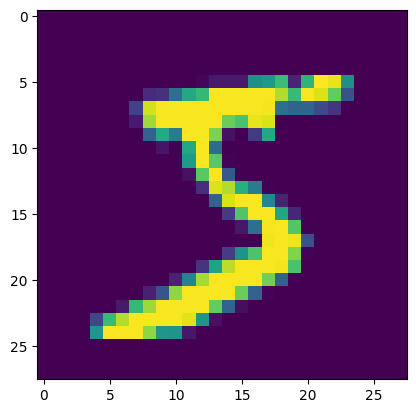

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28, 28))


In [ ]:
def create_model(activation_function):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation_function),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation=activation_function),
        layers.Dense(10, activation='softmax')  # Softmax for output layer
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Create models with different activation functions
model_sigmoid = create_model('sigmoid')
model_tanh = create_model('tanh')
model_relu = create_model('relu')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def train_and_evaluate(model, activation_function_name):
    history = model.fit(x_train, y_train, epochs=10,
                        validation_data=(x_test, y_test),
                        verbose=1)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy with {activation_function_name}: {test_acc}')

    return history, test_acc

# Train and evaluate models
history_sigmoid, acc_sigmoid = train_and_evaluate(model_sigmoid, 'Sigmoid')
history_tanh, acc_tanh = train_and_evaluate(model_tanh, 'Tanh')
history_relu, acc_relu = train_and_evaluate(model_relu, 'ReLU')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 30ms/step - accuracy: 0.5780 - loss: 1.2317 - val_accuracy: 0.9618 - val_loss: 0.1428
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9622 - loss: 0.1315 - val_accuracy: 0.9759 - val_loss: 0.0839
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9772 - loss: 0.0762 - val_accuracy: 0.9823 - val_loss: 0.0570
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9827 - loss: 0.0578 - val_accuracy: 0.9821 - val_loss: 0.0578
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9863 - loss: 0.0466 - val_accuracy: 0.9856 - val_loss: 0.0445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9885 - loss: 0.0388 - val_accuracy: 0.9854 - val_loss: 0.0457
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9897 - loss: 0.0328 - val_accuracy: 0.9864 - val_loss: 0.0410
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9920 -

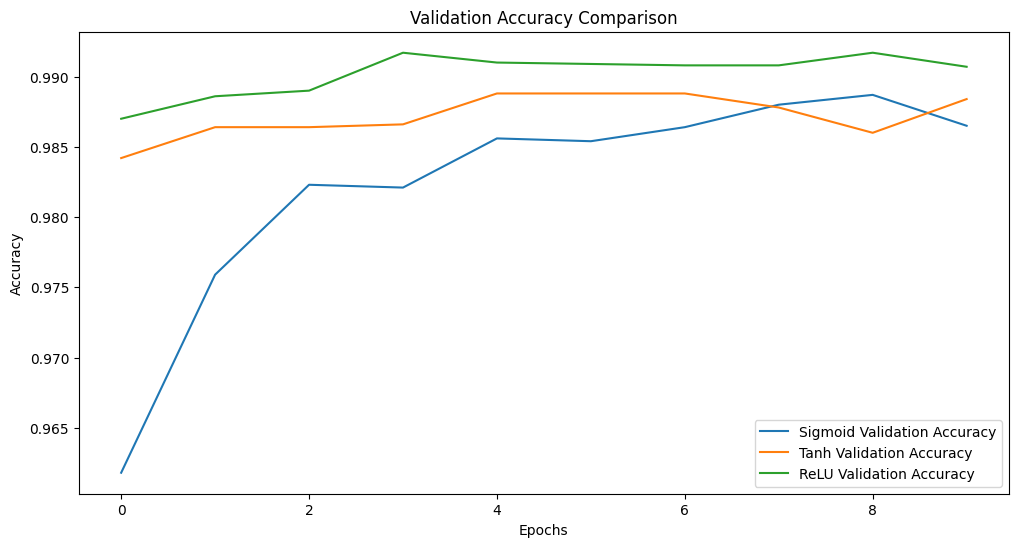

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, title):
    plt.figure(figsize=(12, 6))
    for name, history in histories:
        plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy')

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot validation accuracy for comparison
histories = [('Sigmoid', history_sigmoid), ('Tanh', history_tanh), ('ReLU', history_relu)]
plot_history(histories, 'Validation Accuracy Comparison')